# Explore here

It's recommended to use this notebook for exploration purposes.

    Year  Revenue
0   2024    97.15
1   2023    96.77
2   2022    81.46
3   2021    53.82
4   2020    31.53
5   2019    24.57
6   2018    21.46
7   2017    11.75
8   2016     7.00
9   2015     4.04
10  2014     3.19
11  2013     2.01
12  2012     0.41
13  2011     0.20
14  2010     0.11
15  2009     0.11


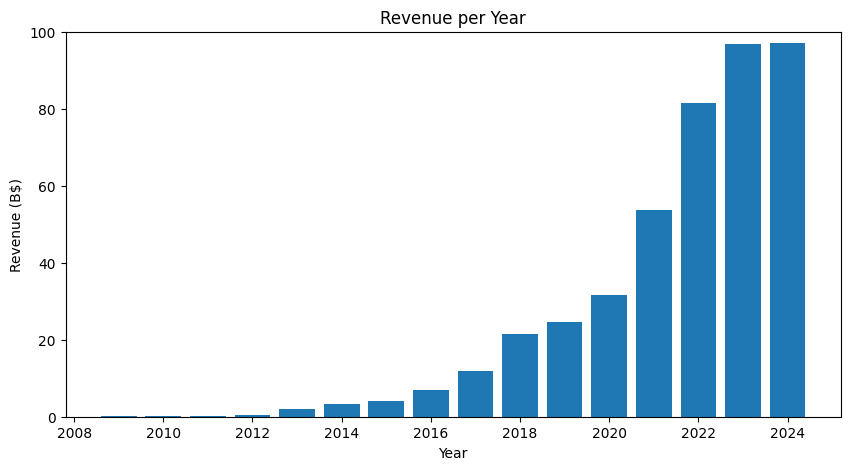

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import urllib.request

# Get request to the url
url = 'https://companiesmarketcap.com/tesla/revenue/'
response = requests.get(url)

# Verify if the request is successful
if response.status_code==200:
  # Scrape information from web page with BeautifulSoup
  soup = BeautifulSoup(response.content, 'html.parser')
  
# Get revenue data
revenue = soup.find(class_='table')

data=[]
for x in revenue.find_all("td"):
  data.append(x.get_text())

# Select only years data
years= data[::3]

# Get the first 4 characters of each year and convert to integer
for i in range(len(years)):
  years[i] = int(years[i][0:4])

# Select only revenue data
revenue_data= data[1::3]

# Get the second to the sixth characters of each revenue data and convert to float
for i in range(len(revenue_data)):
  revenue_data[i] = float(revenue_data[i][1:6])

# Create a dictionary with the two lists
result = {'Year': years, 'Revenue': revenue_data}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(result)
print(df)

# Bar chart
plt.figure(figsize = (10, 5))
plt.bar(years, revenue_data)
plt.title('Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Revenue (B$)')
plt.ylim(0, 100)  # y-axis limits
plt.show()


